## DATA PROCESSING AND VISUALIZATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.preprocessing import StandardScaler
import json


In [2]:
df = pd.read_csv("hvstat_africa_data_v1.0.csv")

print(df.shape)
print(df.info())
print(df.describe())
print(df.head())

(203125, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203125 entries, 0 to 203124
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   fnid                    203125 non-null  object 
 1   country                 203125 non-null  object 
 2   country_code            203125 non-null  object 
 3   admin_1                 203125 non-null  object 
 4   admin_2                 203125 non-null  object 
 5   product                 203125 non-null  object 
 6   season_name             203125 non-null  object 
 7   planting_year           203125 non-null  int64  
 8   planting_month          203125 non-null  int64  
 9   harvest_year            203125 non-null  int64  
 10  harvest_month           203125 non-null  int64  
 11  crop_production_system  203125 non-null  object 
 12  qc_flag                 203125 non-null  int64  
 13  area                    190428 non-null  float64
 14  product

In [3]:
print(df.isnull().sum())

fnid                          0
country                       0
country_code                  0
admin_1                       0
admin_2                       0
product                       0
season_name                   0
planting_year                 0
planting_month                0
harvest_year                  0
harvest_month                 0
crop_production_system        0
qc_flag                       0
area                      12697
production                 4779
yield                     17695
dtype: int64


In [4]:
df = df.drop(columns=["fnid", "admin_2", "country_code"])
df = df[df["qc_flag"] == 0]
df = df.drop(columns=["qc_flag"])



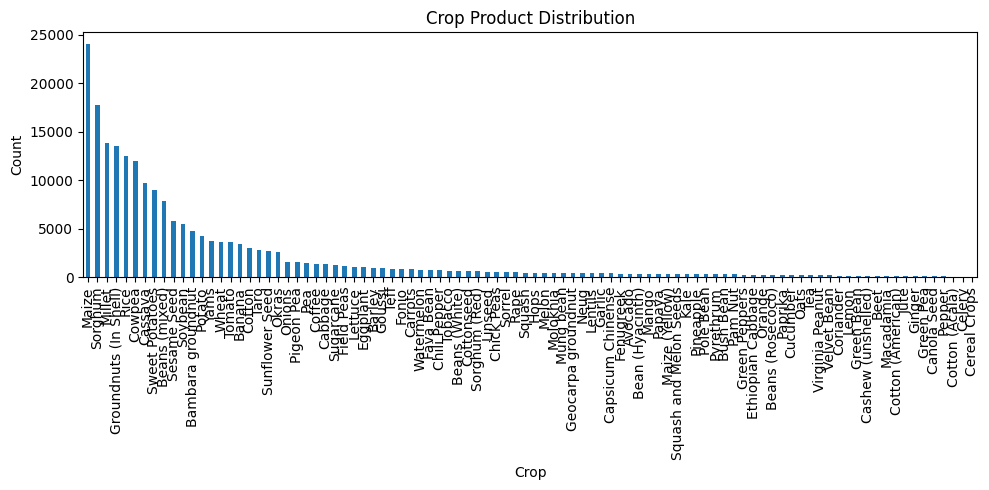

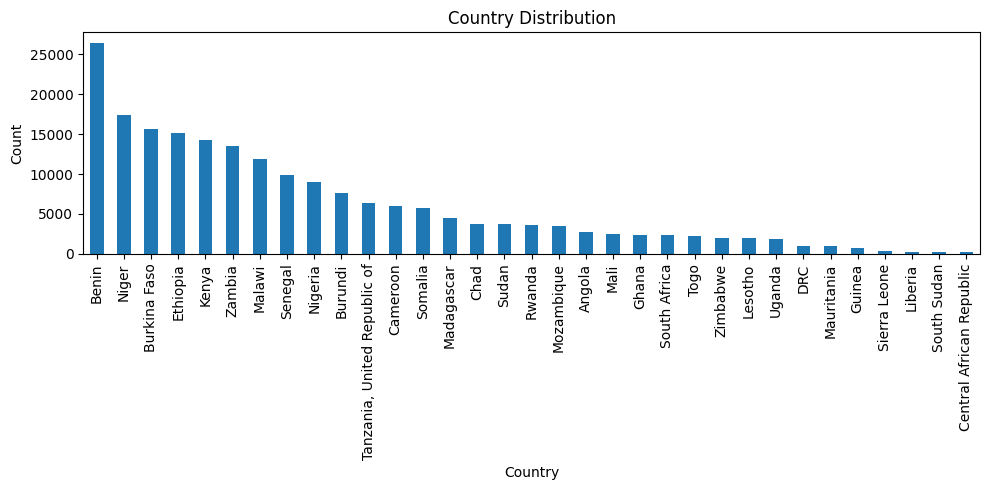

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crop distribution
plt.figure(figsize=(10, 5))
df['product'].value_counts().plot(kind='bar')
plt.title('Crop Product Distribution')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Country distribution
plt.figure(figsize=(10, 5))
df['country'].value_counts().plot(kind='bar')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


C:\Users\fadhl\AppData\Local\Temp\ipykernel_19288\210524839.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='planting_year', y='yield', ci=None)


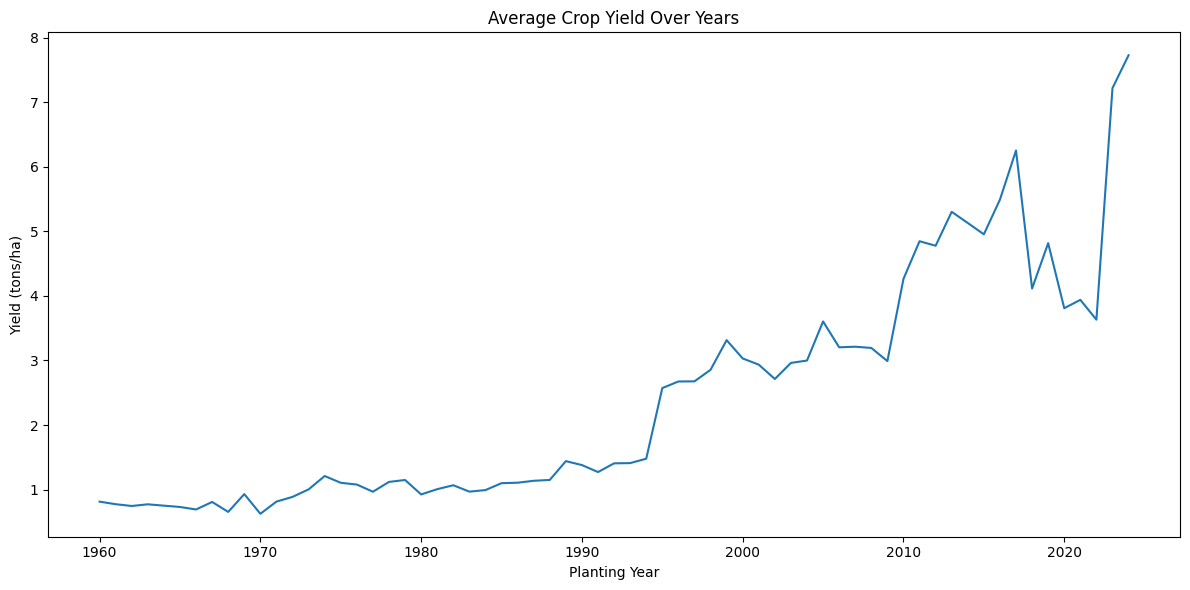

In [6]:
# Line plot: yield over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='planting_year', y='yield', ci=None)
plt.title("Average Crop Yield Over Years")
plt.xlabel("Planting Year")
plt.ylabel("Yield (tons/ha)")
plt.tight_layout()
plt.show()


In [7]:
print(df.columns)

Index(['country', 'admin_1', 'product', 'season_name', 'planting_year',
       'planting_month', 'harvest_year', 'harvest_month',
       'crop_production_system', 'area', 'production', 'yield'],
      dtype='object')


In [8]:
df = df.dropna(subset=['area', 'production', 'yield'])


In [9]:
df['growing_duration'] = (df['harvest_month'] - df['planting_month']) % 12
df['growing_duration'].replace(0, 12, inplace=True)  


C:\Users\fadhl\AppData\Local\Temp\ipykernel_19288\3171713448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['growing_duration'].replace(0, 12, inplace=True)


In [10]:
df.head()

,country,admin_1,product,season_name,planting_year,planting_month,harvest_year,harvest_month,crop_production_system,area,production,yield,growing_duration
0,Angola,Bengo,Banana,Main,2007,10,2008,4,All (PS),1364.0,19588.0,14.360704,6
1,Angola,Bengo,Banana,Main,2008,10,2009,4,All (PS),1364.0,20461.0,15.000733,6
2,Angola,Bengo,Banana,Main,2014,10,2015,4,All (PS),8706.0,222044.0,25.504709,6
3,Angola,Bengo,Banana,Main,2015,10,2016,4,All (PS),8706.0,222044.0,25.504709,6
4,Angola,Bengo,Banana,Main,2016,10,2017,4,All (PS),9549.7,233967.0,24.499932,6


In [11]:
label_cols = ['country', 'admin_1', 'crop_production_system']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

In [12]:
one_hot_cols = ['product', 'season_name']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [13]:
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']

In [14]:
print(df.columns.tolist())


['country', 'admin_1', 'planting_year', 'planting_month', 'harvest_year', 'harvest_month', 'crop_production_system', 'area', 'production', 'yield', 'growing_duration', 'product_Bambara groundnut', 'product_Banana', 'product_Barley', 'product_Bean (Hyacinth)', 'product_Beans (Rosecoco)', 'product_Beans (White)', 'product_Beans (mixed)', 'product_Beet', 'product_Bush Bean', 'product_Cabbage', 'product_Canola Seed', 'product_Capsicum Chinense', 'product_Carrots', 'product_Cashew (unshelled)', 'product_Cassava', 'product_Celery', 'product_Cereal Crops', 'product_Chick Peas', 'product_Chili Pepper', 'product_Coffee', 'product_Coriander', 'product_Cotton', 'product_Cotton (Acala)', 'product_Cotton (American)', 'product_Cottonseed', 'product_Cowpea', 'product_Cucumber', 'product_Eggplant', 'product_Ethiopian Cabbage', 'product_Fava Bean', 'product_Fenugreek', 'product_Field Peas', 'product_Fonio', 'product_Garlic', 'product_Geocarpa groundnut', 'product_Ginger', 'product_Goussi', 'product_Gre

In [15]:
X = df.drop(columns=['production', 'yield'])
y = df['production']


In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# After fitting StandardScaler, save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:

feature_names = df.drop(columns='production').columns.tolist()

# Then save it
import joblib
joblib.dump(feature_names, 'feature_names.pkl')


['feature_names.pkl']

## LINEAR REGRESSION

In [20]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)


In [22]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = train_mse ** 0.5
test_rmse = test_mse ** 0.5

print(f"Train MSE: {train_mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train MSE: 35637740393.3285
Train RMSE: 188779.6080
Test MSE: 34132191332.8956
Test RMSE: 184748.9955


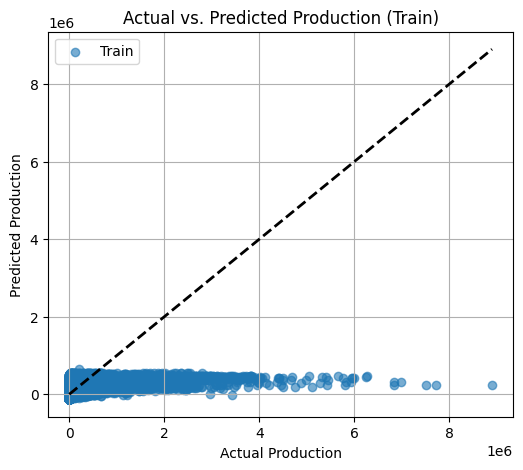

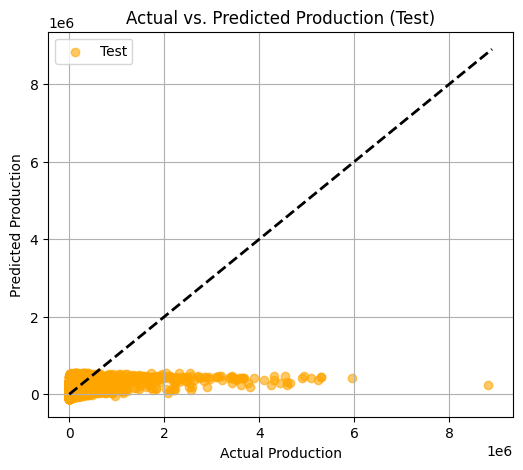

In [23]:
import matplotlib.pyplot as plt

# Training set
plt.figure(figsize=(6, 5))
plt.scatter(y_train, y_train_pred, alpha=0.6, label='Train')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Actual vs. Predicted Production (Train)')
plt.legend()
plt.grid(True)
plt.show()

# Test set
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='orange', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Actual vs. Predicted Production (Test)')
plt.legend()
plt.grid(True)
plt.show()


## DECISION TREE

In [25]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [26]:
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)


In [27]:
train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
train_rmse_dt = train_mse_dt ** 0.5
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
test_rmse_dt = test_mse_dt ** 0.5

print("Decision Tree Regressor")
print("Train MSE:", train_mse_dt)
print("Train RMSE:", train_rmse_dt)
print("Test MSE:", test_mse_dt)
print("Test RMSE:", test_rmse_dt)


Decision Tree Regressor
Train MSE: 10298.93760168287
Train RMSE: 101.48368145511311
Test MSE: 5230155617.739011
Test RMSE: 72319.81483479483


## RANDOM FOREST

In [28]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, random_state=42)

In [29]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)


In [30]:
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = train_mse_rf ** 0.5
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = test_mse_rf ** 0.5

print("Random Forest Regressor")
print("Train MSE:", train_mse_rf)
print("Train RMSE:", train_rmse_rf)
print("Test MSE:", test_mse_rf)
print("Test RMSE:", test_rmse_rf)


Random Forest Regressor
Train MSE: 659056285.983247
Train RMSE: 25672.091577883697
Test MSE: 3753851658.9103217
Test RMSE: 61268.684161734054


## SAVING THE BEST MODEL

In [ ]:
import joblib
joblib.dump(rf_model, 'best_model.pkl')


['best_model.pkl']